# **Alcohol consumption**
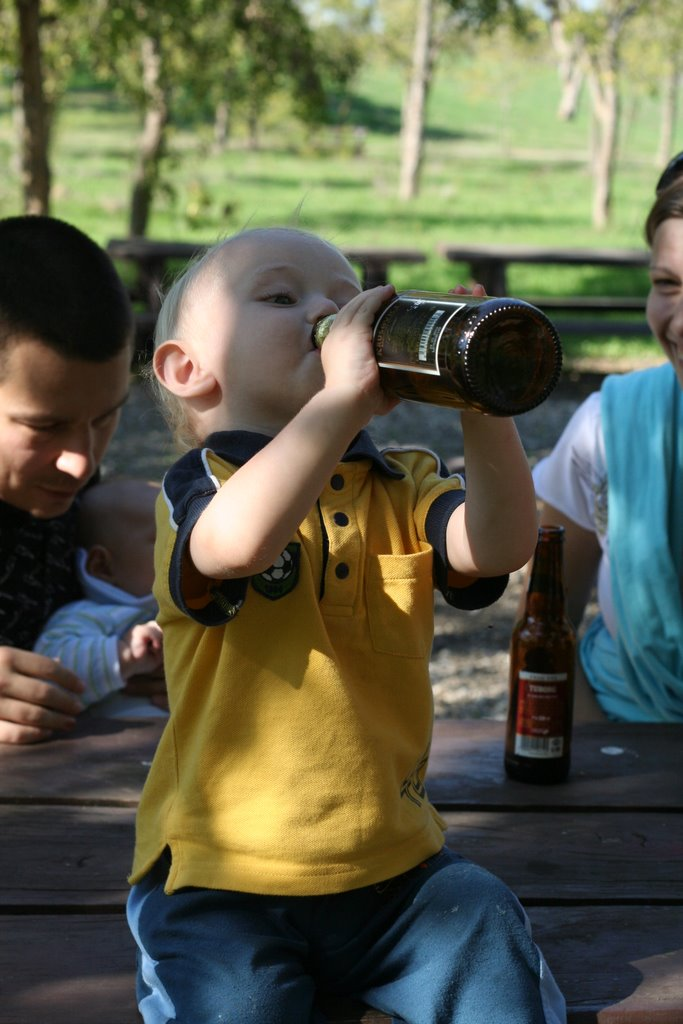


In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('total-alcohol-consumption-per-capita-litres-of-pure- ahcool new.csv')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 926 entries, 0 to 925
Data columns (total 4 columns):
 #   Column                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                --------------  -----  
 0   Entity                                                                                                926 non-null    object 
 1   Code                                                                                                  924 non-null    object 
 2   Year                                                                                                  926 non-null    int64  
 3   Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)  926 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 29.1+ KB


In [21]:
df = df.rename(columns={'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)': 'Total consumption'}) 
#בשביל שימוש יותר קל "Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)" שינוי שם לעמודה 

#### **איסוף מידע ראשוני**
כמות הרשומות בבסיס הנתונים 926
* Entity - מדינה או מדינות
* Code - שם מקוצר למדינה/ות
* Year - שנה שבה נערכה הבדיקה
* Total consumption - סך כל צריכת האלכוהול לכל אדם בליטרים 

ליטר 1 = 20 ליטר של בירה 5%

In [22]:
df['Total consumption'] = df['Total consumption'].astype(float) # change the type of "Total consumption" to float

In [23]:
continents = pd.read_csv('Countries_by_continents.csv')# מערך מידע עם כל המדינות מחולקות ליבשות

df = pd.merge(df, continents, left_on='Entity', right_on='Country', how='left')
df.drop('Country', axis=1, inplace=True)# הוספה של עמודת יבשות

column_order = ['Entity', 'Code', 'Year', 'Total consumption', 'Continent']
df=df[column_order]

print(df)

          Entity Code  Year  Total consumption Continent
0    Afghanistan  AFG  2010               0.21      Asia
1    Afghanistan  AFG  2015               0.21      Asia
2    Afghanistan  AFG  2018               0.21      Asia
3        Albania  ALB  2000               6.57    Europe
4        Albania  ALB  2005               7.65    Europe
..           ...  ...   ...                ...       ...
921     Zimbabwe  ZWE  2000               2.46    Africa
922     Zimbabwe  ZWE  2005               2.77    Africa
923     Zimbabwe  ZWE  2010               3.93    Africa
924     Zimbabwe  ZWE  2015               4.92    Africa
925     Zimbabwe  ZWE  2018               4.67    Africa

[926 rows x 5 columns]


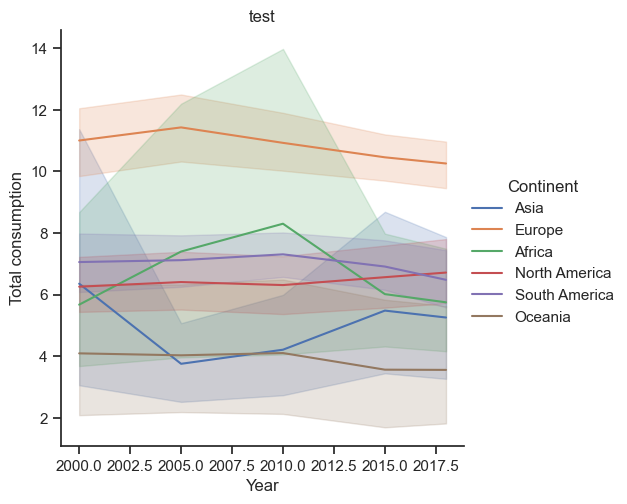

In [24]:
# Graph 1
sns.set_theme(style='ticks')

sns.relplot(data=df, x='Year', y= 'Total consumption',hue='Continent',kind='line')

plt.title('test')

plt.show()

### גרף 1
ניתן להסיק מגרף מספר 1 שבממוצע בכל העולם חוץ מאירופה שותים בין 4 - 8 ליטר של אלכוהול טהור. באירופה שותים הכי הרבה אלכוהול בממוצע בין 10 - 12 ליטרים לאדם.
בנוסף לא ניתן להסתמך על המידע באסיה ואפריקה מפני שסתיית התקן בהן גדולה מאוד, ולכן הגרף לא מייצג את הממוצע בצורה טובה.

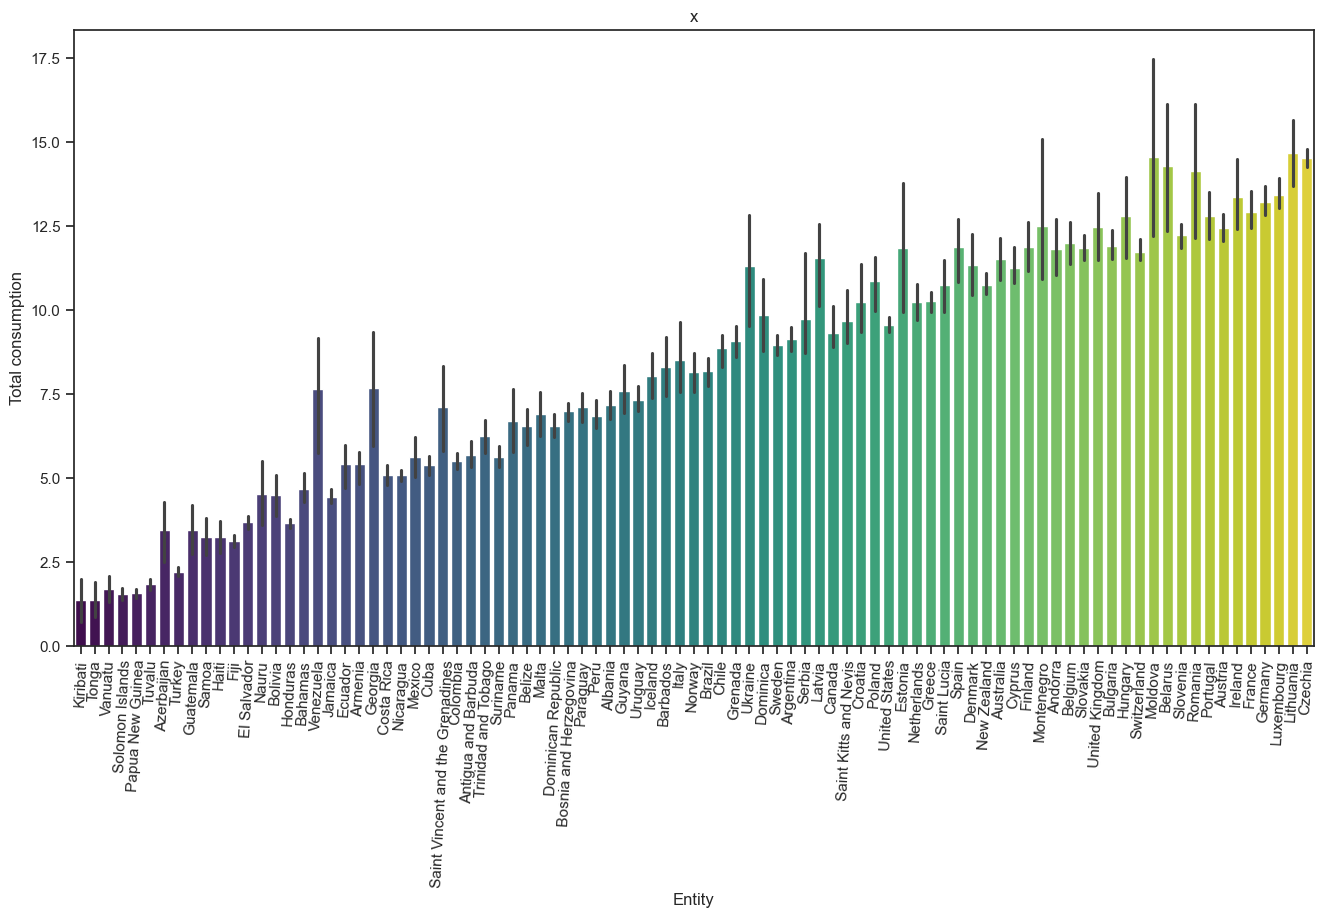

In [58]:
#Graph 2
valid_world = df[(df['Continent'] == 'Europe') | (df['Continent'] == 'Oceania') | (df['Continent'] == 'North America') | (df['Continent'] == 'South America')]

valid_world = valid_world.sort_values(by='Total consumption')

plt.figure(figsize=(16,8))

sns.set_theme(style='ticks')
sns.barplot(data=valid_world,x='Entity',y='Total consumption',hue='Entity',palette='viridis')

plt.xticks(rotation=87)

plt.title('x')
plt.show()

In [49]:
happiness = pd.read_csv('2015.csv')

happiness.drop('Region',axis=1,inplace=True)
happiness.drop('Happiness Rank',axis=1,inplace=True)
happiness.drop('Standard Error',axis=1,inplace=True)
happiness.drop('Freedom',axis=1,inplace=True)
happiness.drop('Trust (Government Corruption)',axis=1,inplace=True)
happiness.drop('Family',axis=1,inplace=True)
happiness.drop('Dystopia Residual',axis=1,inplace=True)

world_happiness = pd.merge(valid_world, happiness, left_on='Entity', right_on='Country', how='inner')
world_happiness.drop('Country', axis=1, inplace=True)

world_happiness 

,Entity,Code,Year,Total consumption,Continent,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Generosity
0,Azerbaijan,AZE,2005,1.81,Europe,5.212,1.02389,0.64045,0.07799
1,Turkey,TUR,2018,2.05,Europe,5.332,1.06098,0.73172,0.12253
2,Turkey,TUR,2015,2.12,Europe,5.332,1.06098,0.73172,0.12253
3,Turkey,TUR,2005,2.12,Europe,5.332,1.06098,0.73172,0.12253
4,Turkey,TUR,2010,2.32,Europe,5.332,1.06098,0.73172,0.12253
...,...,...,...,...,...,...,...,...,...
324,Romania,ROU,2005,15.84,Europe,5.124,1.04345,0.76890,0.13748
325,Lithuania,LTU,2005,16.10,Europe,5.833,1.14723,0.73128,0.02641
326,Belarus,BLR,2010,17.43,Europe,5.813,1.03192,0.73608,0.11046
327,Romania,ROU,2000,17.45,Europe,5.124,1.04345,0.76890,0.13748


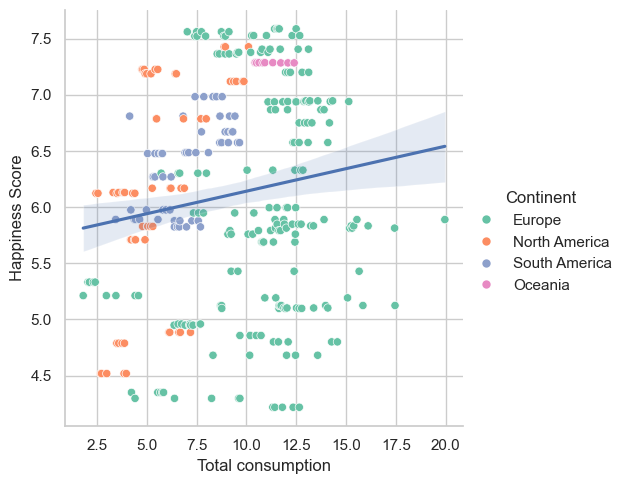

In [48]:
sns.set_theme(style="whitegrid")

scatter_plot = sns.relplot(data=world_happiness, x='Total consumption', y='Happiness Score', hue='Continent', palette="Set2")

sns.regplot(data=world_happiness, x='Total consumption', y='Happiness Score', scatter=False, ax=scatter_plot.ax)

# Show the plot
plt.show()

<Axes: >

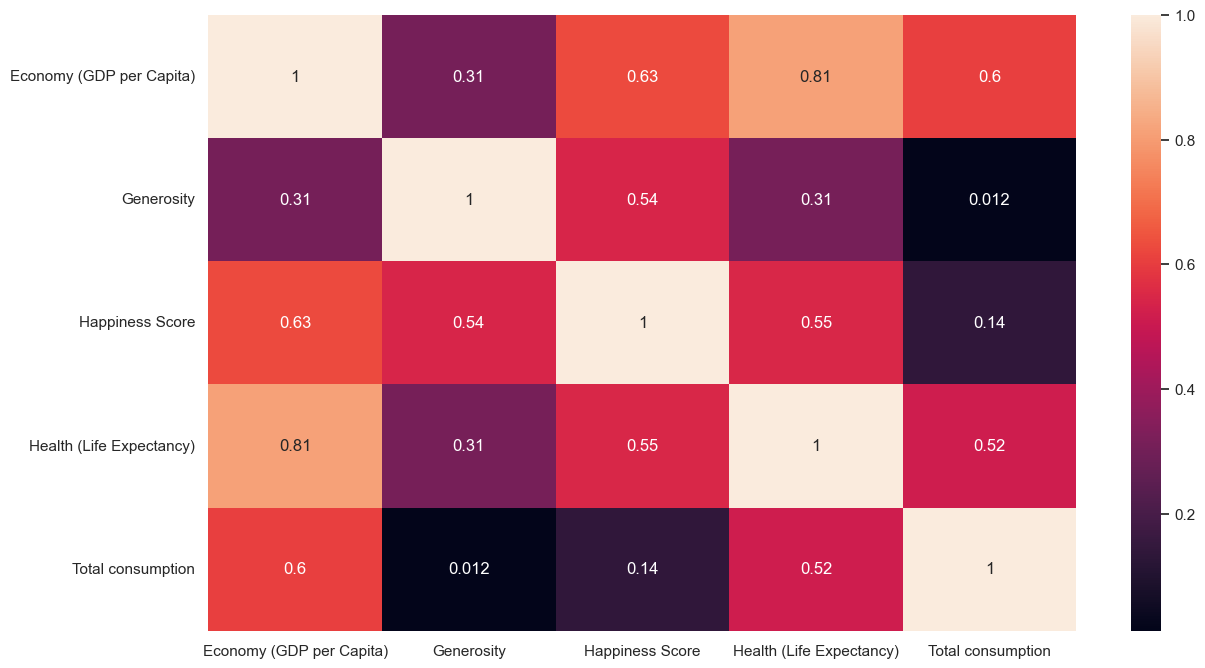

In [42]:
corelation_pivot = pd.pivot_table(data=world_happiness[world_happiness['Year']==2015],index= 'Entity' ,columns=[],values=['Total consumption','Happiness Score','Economy (GDP per Capita)','Health (Life Expectancy)','Generosity'])

corelation_pivot.head()

plt.figure(figsize=(14,8))
sns.heatmap(corelation_pivot.corr(), annot=True)